# BERT (2) - Lifferth (2018) dataset.

The notebook uses the bert-base-uncased model with Lifferth's (2018) training dataset:

> https://www.kaggle.com/competitions/fake-news

##### Parameters:
  max length: 16, batch size: 32, epochs: 2

In [1]:
# Install specific libraries
! pip install transformers
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 21.7 MB/s eta 0:0

In [2]:
!pip install scikit-learn==1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import numpy as np
import pandas as pd
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
# specify GPU
device = torch.device("cuda")

In [4]:
# Mount Google Drive - applicable, if working on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Set Working Directory - if working on Google Drive
#%cd /content/drive/MyDrive/1_LiveProjects/Project11_FakeNewsDetection
%cd /content/drive/MyDrive/FNTP-Colab_Files

# # Set Working Directory - if working on Local Machine
# import os
# os.chdir('/Users//replace_me')

/content/drive/MyDrive/FNTP-Colab_Files


## Load Dataset

In [55]:
# Load LSTM Datasets (already pre-labelled)
lstm_train = pd.read_csv('/content/drive/MyDrive/FNTP-Colab_Files/train.csv')

#the LSTM training set is already pre-labbeled so we should be able to simply pass this thorugh the best model and fine-tune it to this dataset.


In [56]:
lstm_train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [57]:
lstm_train = lstm_train.drop(['id',], axis=1)
lstm_train

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [58]:
lstm_train = lstm_train.drop(['author', 'text'], axis=1)
lstm_train

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1
...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",0
20797,Macy’s Is Said to Receive Takeover Approach by...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


([<matplotlib.patches.Wedge at 0x795f15b4c070>,
 [Text(-1.1999976867063213, -0.0023562469051224867, 'Fake'),
  Text(1.1999976867063213, 0.0023562469051218067, 'True')],
 [Text(-0.6999986505786873, -0.0013744773613214504, '50.1%'),
  Text(0.6999986505786873, 0.0013744773613210536, '49.9%')])

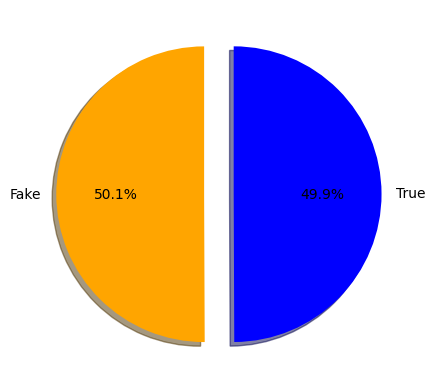

In [59]:
# Checking if our data is well balanced
data = lstm_train  #setting lstm_train data to 'data' so I do not have to adapt the rest of the notebook to run the dataset.
label_size = [data['label'].sum(),len(data['label'])-data['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['orange','blue'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')
#data is even closer to 50/50 than the initial BERT dataset.

In [60]:
#check for missing values
data.isnull().sum()

title    558
label      0
dtype: int64

In [61]:
data['title'] = data[['title']].fillna(value = 'Missing')
data = data.dropna()
data.isnull().sum()

title    0
label    0
dtype: int64

## Train-test-split

In [62]:
# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(data['title'], data['label'],
                                                                    random_state=2018,
                                                                    test_size=0.3,)
# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

## BERT Fine-tuning

### Load pretrained BERT Model

In [63]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [64]:
data

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1
...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",0
20797,Macy’s Is Said to Receive Takeover Approach by...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


### Prepare Input Data

In [66]:
# BERT Tokeizer Functionality
sample_data = ["Lucy is using this model for university reseach"]    # sample data for tokenizing
tokenized_sample_data = tokenizer.batch_encode_plus(sample_data,
                                                    padding=True)     # encode text
print(tokenized_sample_data)

# Ref: https://huggingface.co/docs/transformers/preprocessing

{'input_ids': [[101, 7004, 2003, 2478, 2023, 2944, 2005, 2118, 24501, 5243, 2818, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [67]:
# Majority of titles above have word length under 16. So, we set max title length as 15
MAX_LENGTH = 16
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

In [68]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [70]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32                                               #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

### Freeze Layers

In [71]:
# Freezing the parameters and defining trainable BERT structure
for param in bert.parameters():
    param.requires_grad = False    # false here means gradient need not be computed

### Define Model Architecture

In [72]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,2)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate
# Define the loss function
cross_entropy  = nn.NLLLoss()
# Number of training epochs
epochs = 2

### Define Train & Evaluate Function

In [73]:
# Defining training and evaluation functions
def train():
  model.train()
  total_loss, total_accuracy = 0, 0

  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():
  print("\nEvaluating...")
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(val_dataloader):    # Iterate over batches
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

### Model training

In [74]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 2
  Batch    50  of    455.
  Batch   100  of    455.
  Batch   150  of    455.
  Batch   200  of    455.
  Batch   250  of    455.
  Batch   300  of    455.
  Batch   350  of    455.
  Batch   400  of    455.
  Batch   450  of    455.

Evaluating...
  Batch    50  of     98.

Training Loss: 0.681
Validation Loss: 0.666

 Epoch 2 / 2
  Batch    50  of    455.
  Batch   100  of    455.
  Batch   150  of    455.
  Batch   200  of    455.
  Batch   250  of    455.
  Batch   300  of    455.
  Batch   350  of    455.
  Batch   400  of    455.
  Batch   450  of    455.

Evaluating...
  Batch    50  of     98.

Training Loss: 0.666
Validation Loss: 0.654


### Model performance

In [75]:
# load weights of best model
#path = 'c1_fakenews_weights.pt'
path = '/content/drive/MyDrive/FNTP-Colab_Files/c2_new_model_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [76]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58      1555
           1       0.60      0.72      0.66      1565

    accuracy                           0.62      3120
   macro avg       0.63      0.62      0.62      3120
weighted avg       0.63      0.62      0.62      3120



## Fake News Predictions

In [77]:
# # load weights of best model
# path = 'c1_fakenews_weights.pt'
# model.load_state_dict(torch.load(path))

In [78]:
# testing on ChatGPT3.5 outputs:
unseen_news_text = ["Government Unveils Ambitious Plan to Modernize Public Transport Infrastructure",        #all of which are fake
                    "Landmark Education Reform Bill Passes Amidst Debate Over Curriculum Changes",
                    "National Health Service Announces Innovative Telemedicine Initiative",
                    "Local Community Rallies Together to Restore Historic Landmark",
                    "Exclusive Interview: Leading Scientist Discusses Breakthrough in Climate Research",
                    "UK Economy Shows Signs of Recovery as Unemployment Rates Drop",
                    "New Study Reveals Alarming Rise in Childhood Obesity Rates",
                    "Royal Family Attends Charity Event, Highlights Philanthropic Efforts",
                    "Brexit Trade Talks Reach Critical Phase as Negotiators Seek Common Ground",
                    "Artificial Intelligence Adoption Grows, Raising Questions About Automation Impact",
                    "Nation Celebrates Cultural Diversity with Vibrant Annual Festival",
                    "National Security Alert: Government Increases Counterterrorism Measures",
                    "Investigation Uncovers Scandal Involving Prominent Political Figure",
                    "Wildlife Conservation Efforts Pay Off as Endangered Species Thrive",
                    "Youth-Led Climate Protest Draws Thousands, Demanding Government Action",
                    "Tech Startups Flourish as Entrepreneurial Spirit Gains Momentum",
                    "Housing Crisis Prompts Calls for Affordable Housing Solutions",
                    "Transportation Disruption: Commuters Brace for Rail Network Overhaul",
                    "Entertainment Industry Embraces Virtual Platforms Amidst Pandemic Challenges",
                    "Innovative British Invention Revolutionizes Renewable Energy Storage"
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 20
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [79]:
# testing on BARD outputs:
unseen_news_text = ["Queen Elizabeth II to step down from throne after 70 years",                   #real
                    "UK government to introduce mandatory vaccination for all adults",              #real
                    "New study finds that climate change is causing more extreme weather events",   #fake
                    "Trump announces run for president in 2024",                                    #real
                    "North Korea fires ballistic missile into the Sea of Japan",                    #real
                    "China overtakes US as world's largest economy",                                #real
                    "EU agrees to ban all Russian oil imports",                                     #real
                    "Huge asteroid to pass close to Earth next week",                               #fake
                    "Scientists discover new planet that could support life",                       #real
                    "Major breakthrough in cancer research",                                        #fake
                    "Boris Johnson to resign after partygate scandal",                              #real
                    "Keir Starmer to become next Prime Minister",                                   #fake
                    "Labour Party to win general election with landslide victory",                  #real
                    "SNP to win Scottish independence referendum",                                  #real
                    "UK to leave European Union without a deal",                                    #real
                    "Second COVID-19 pandemic hits UK",                                             #fake
                    "Huge earthquake hits London",                                                  #fake
                    "Met Office issues 'red alert' for extreme heat",                               #fake
                    "UK to experience worst drought in 100 years",                                  #real
                    "Wildfires destroy large swathes of countryside",                               #real
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 20
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [80]:
# testing on HuggingChat outputs:
unseen_news_text = ["US and China edge closer to trade deal, but tensions remain",                              #all of which are real
                    "NATO chief warns of Russian threat to European security",
                    "Iran nuclear deal on life support as France, Germany threaten to pull out",
                    "North Korea fires ballistic missile, sparking alarm in Seoul and Tokyo",
                    "UK PM Johnson denies cover-up over Parliament shutdown, defends Brexit strategy",
                    "Pakistan PM Khan calls for dialogue with India after Kashmir clashes",
                    "Putin's party wins majority in Russian parliamentary elections",
                    "US Defense Secretary Esper visits Kabul, promises continued support for Afghan forces",
                    "Sudan's Bashir sentenced to 20 years in prison for corruption",
                    "Protests erupt in Egypt after government proposes constitutional changes",
                    "Netanyahu's Likud Party wins Israeli election, setting up right-wing coalition",
                    "Thousands march in London to demand second Brexit referendum",
                    "US and South Korea begin joint military exercises, angering Pyongyang",
                    "Erdogan's AKP loses Istanbul mayoralty in blow to Turkish president",
                    "Hong Kong police arrest dozens in latest anti-government protests",
                    "Indonesia's Widodo inaugurated for second term, vows to tackle radicalism",
                    "Mali's Keita names new government after resignation of prime minister",
                    "UN Security Council extends Somalia peacekeeping mission",
                    "Czech PM Babis survives no-confidence vote, keeps grip on power",
                    "Myanmar's Suu Kyi faces pressure over Rohingya genocide allegations at ICJ",
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 20
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])